# 1. Importar librería

In [1]:
from time_series_analyzer import TimeSeriesAnalyzer

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Importar dataset

```TimeSeriesAnalyzer()``` recibe de parámetros:
- El dataset en formato ```csv```
- La columna/variable de tiempo

In [2]:
analyzer = TimeSeriesAnalyzer("mock_kaggle.csv", "data")
summary = analyzer.get_statistical_summary()
print(summary)

                     venda      estoque       preco
count           937.000000   937.000000  937.000000
mean             90.533618  1608.258271    1.592572
std              80.682089  1356.691877    0.529502
min               0.000000     0.000000    0.000000
25%              33.000000   794.000000    1.290000
50%              76.000000  1348.000000    1.390000
75%             127.000000  1964.000000    1.890000
max             542.000000  7228.000000    2.980000
missing_values    0.000000     0.000000    0.000000
unique_values   261.000000   724.000000   55.000000


# 3. Correr visualizaciones

## Serie de tiempo con todas las variables disponibles

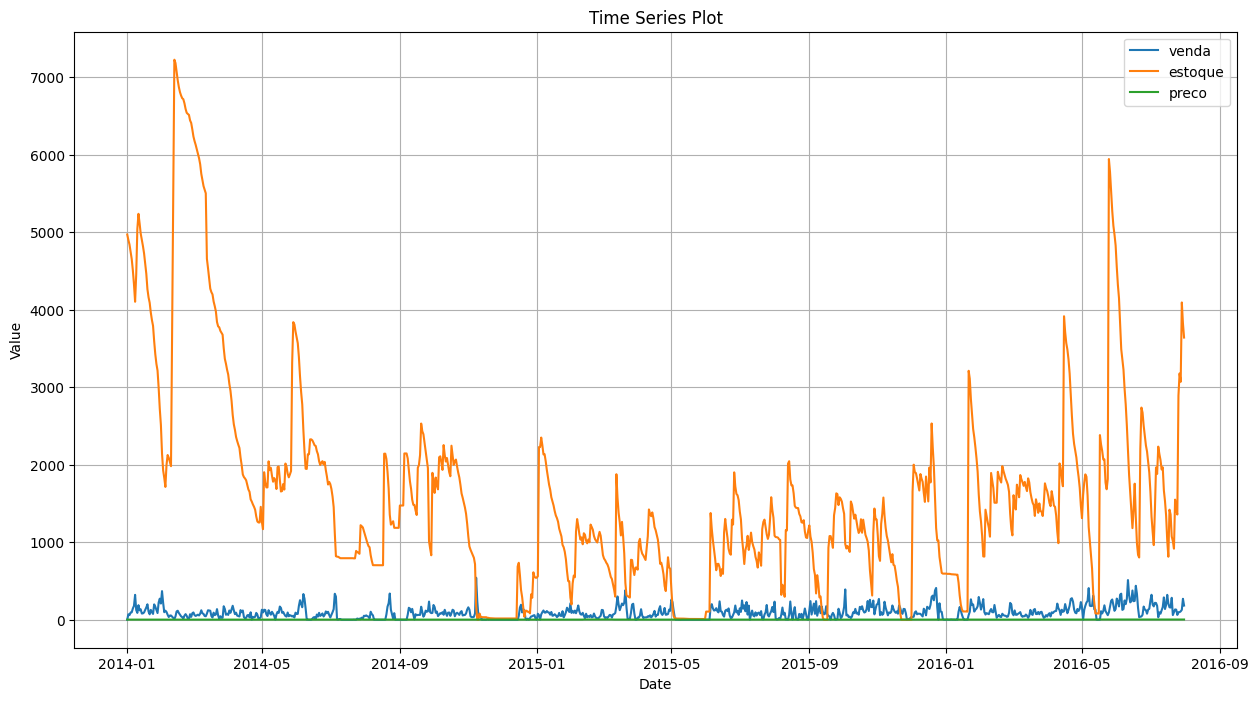

In [3]:
analyzer.plot_time_series()

## Serie de tiempo de columnas en específico

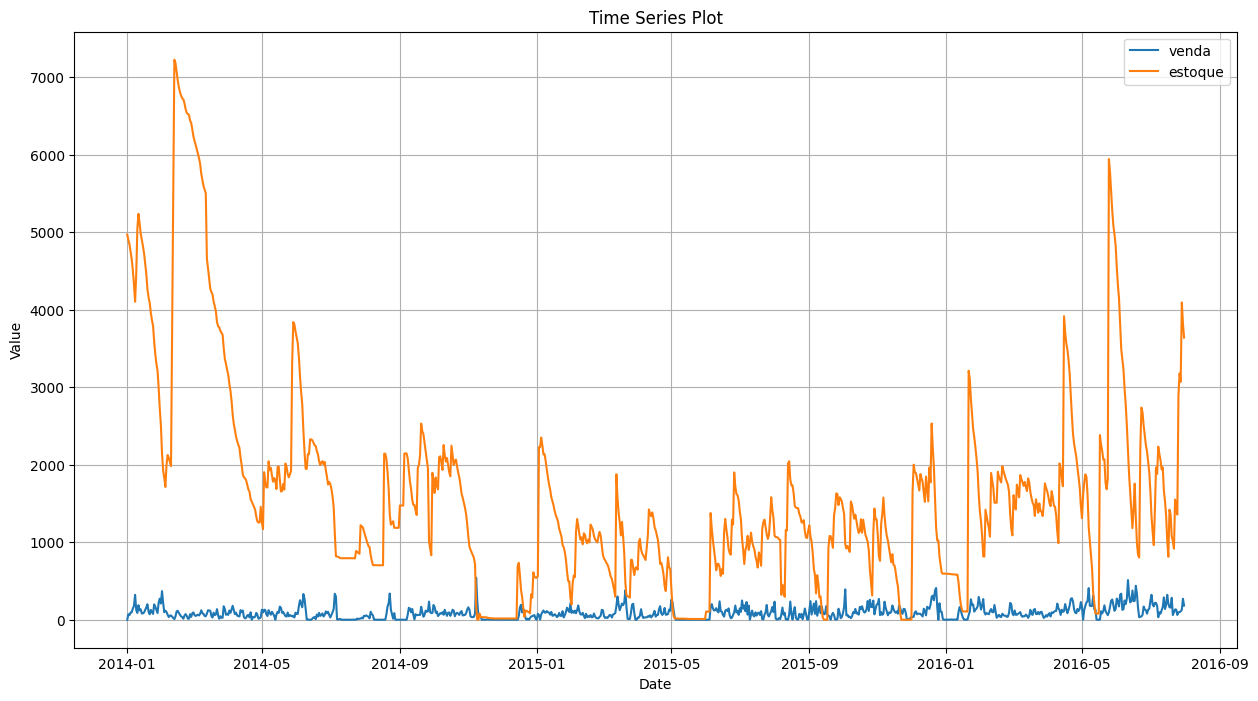

In [4]:
analyzer.plot_time_series(columns=['venda', 'estoque'])

## Mostrar pronóstico de la columna venda para 30 períodos

14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] done processing


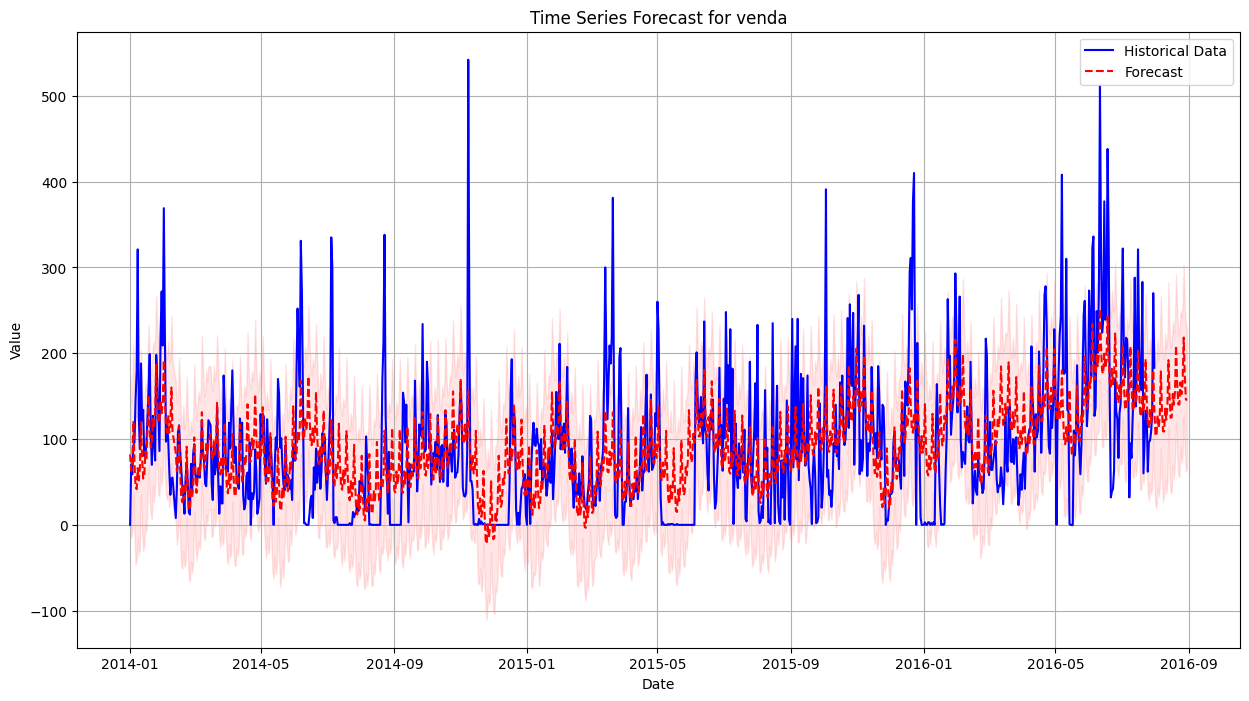

In [5]:
analyzer.plot_forecast('venda', periods=30)

## Análisis más detallado del pronóstico

In [6]:
forecast = analyzer.forecast('venda', periods=30, changepoint_prior_scale=0.1)
print("Forma del pronóstico:", forecast.shape)
print("\nPrimeras filas del pronóstico:")
print(forecast.head())

14:36:25 - cmdstanpy - INFO - Chain [1] start processing
14:36:25 - cmdstanpy - INFO - Chain [1] done processing


Forma del pronóstico: (967, 19)

Primeras filas del pronóstico:
          ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2014-01-01  109.011376   17.548000  172.798545   109.011376   109.011376   
1 2014-01-02  108.772791   -1.539036  150.830402   108.772791   108.772791   
2 2014-01-03  108.534205    0.484852  160.646682   108.534205   108.534205   
3 2014-01-04  108.295620   46.887425  213.453856   108.295620   108.295620   
4 2014-01-05  108.057035    3.143632  169.081217   108.057035   108.057035   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0      -14.311769            -14.311769            -14.311769   1.430937   
1      -33.443701            -33.443701            -33.443701 -13.536407   
2      -24.614913            -24.614913            -24.614913  -1.015464   
3       24.353787             24.353787             24.353787  51.079820   
4      -22.918608            -22.918608            -22.918608   6.288214   

   weekly_